In [1]:
#Imports
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np

from ast import literal_eval

## Natural Language Inference

"Is the hypothesis entailed or contradicted (or neither) by the premise?"

Original dataset - SNLI:
* 570k sentence pairs
* 5 annotations each
* 0th annotator: gets image and provides description $\rightarrow$ premise
* 1st annotator: gets description and provides 3 alternative descriptions, one entailing, one neutral, one contradicting $\rightarrow$ personal ground truth$\rightarrow$ hypothesis
* 2nd, 3rd, 4th and 5th annotators: get premise and hypothesis, provide labels $\rightarrow$ 4 independent votes

ChaosNLI dataset:
* collect 100 independent labels for examples where majority label agrees with only three out of five individual labels collected by the original work $\rightarrow$ high abiguity
* 1.5k sentence pairs
* 100 annotations each



Is the hypothesis entailed or contradicted (or neither) by the premise?

| Premise | Hypothesis | Label count [E, N, C] | Entropy |
|---|---|---|---|
|'A man running a marathon talks to his friend.'|'There is a man running.'| [100, 0, 0] | 0 |
|'Man standing on a tricycle riding in front of a crowd.'| 'A man is on a bike.' | [46, 5, 49] | 1.236|
|'An elderly woman crafts a design on a loom.'| 'The woman is sewing.'| [35, 31, 34] | 1.583 |

In [2]:
#load data
df_snli = pd.read_csv('../data/final/snli-clean.csv',escapechar="\\", index_col=0)
df_snli.old_labels = df_snli.old_labels.apply(literal_eval)  # since quotes in list elements are escaped

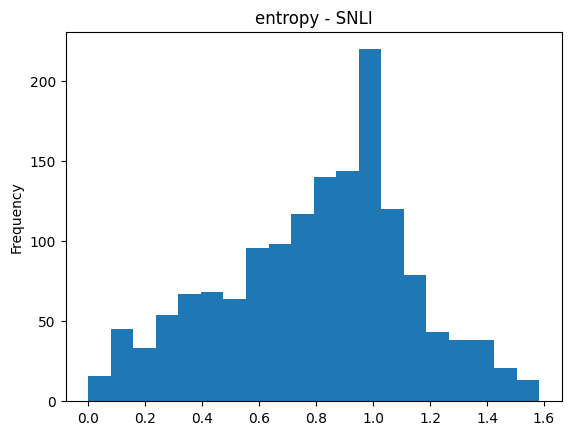

In [3]:
df_snli['entropy'].plot(kind='hist', title='entropy - SNLI', bins = 20, legend=None);

* high entropy for many sentence pairs
* equals to annotator disagreement
* attention: this is a subsample of the original dataset $\rightarrow$ higher entropy by construction
* entropy = 0, all votes on one class
* entropy = 1, votes are quite equally distributed among 2 classes
* entropy = 1.58, maximal value, votes are equally distributed among all 3 classes

In [4]:
snli_one_hot = df_snli[['e','n', 'c']]
snli_one_hot_arr = np.array(snli_one_hot).astype(int)

#frequency of all votes
rel_freq = np.sum(snli_one_hot_arr,axis=0)/(100*len(snli_one_hot_arr))

#frequency of personal ground truth
gt_freq = np.unique(df_snli['ground_truth'],return_counts=True)
#as the labels are initially sorted alphabetically, we manually fix the order: E, N, C
rel_freq_gt = gt_freq[1][[1,2,0]]/len(df_snli)

#frequency of majority vote label
m_vote_freq = np.unique(df_snli['majority_label'], return_counts=True)
#as the labels are initially sorted alphabetically, we manually fix the order: E, N, C
rel_freq_m_vote = m_vote_freq[1][[1,2,0]]/len(df_snli)

In [5]:
pd.DataFrame({"freq_m_vote":np.around(rel_freq_m_vote,3), "freq_gt":np.around(rel_freq_gt,3), "freq_all_votes":np.around(rel_freq,3)}, index = ['entail','neutral', 'contradict'])

,freq_m_vote,freq_gt,freq_all_votes
entail,0.278,0.313,0.298
neutral,0.537,0.446,0.503
contradict,0.185,0.241,0.199


neural is more common than entailment or contradiction. 